In [129]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import os

os.chdir("C:\\Users\\olya\\Downloads")

In [130]:
df = pd.read_csv('Таблица3(Электронно-микрозондовый анализ формовочных масс).tsv', sep='\t')
df

,Территория,Тип_керамики,Номер_образца,K,Ca,SiO2,Na,K.1,Ca.1,Mg,Ti,Fe
0,О-в_Сахалин,Охотский,31,"0,05","0,04","0,94","0,48","0,48","0,04","0,01","0,16","0,83"
1,О-в_Сахалин,Охотский,71,"0,05","0,06","0,88","0,45","0,25","0,30","0,02","0,20","0,78"
2,О-в_Сахалин,Охотский,11,"0,16","0,06","0,78","0,40","0,43","0,17","0,03","0,13","0,83"
3,О-в_Сахалин,Охотский,131,"0,20","0,05","0,75","0,54","0,37","0,09","0,00","0,14","0,86"
4,О-в_Сахалин,Охотский,141,"0,09","0,01","0,89","0,43","0,50","0,08","0,03","0,12","0,85"
...,...,...,...,...,...,...,...,...,...,...,...,...
74,Г._Есаши,Охотский,16,"0,27","0,26","0,47","0,57","0,22","0,21","0,26","0,15","0,59"
75,Г._Есаши,Охотский,22,"0,14","0,53","0,33","0,41","0,12","0,47","0,32","0,20","0,48"
76,Г._Есаши,Охотский,35,"0,15","0,63","0,22","0,56","0,09","0,35","0,11","0,33","0,56"
77,Г._Есаши,Охотский,61,"0,15","0,56","0,29","0,52","0,10","0,37","0,37","0,26","0,37"


In [131]:
df.dtypes

Территория       object
Тип_керамики     object
Номер_образца    object
K                object
Ca               object
SiO2             object
Na               object
K.1              object
Ca.1             object
Mg               object
Ti               object
Fe               object
dtype: object

In [132]:
i=0
while i<len(df):
    df.at[i,'K'] = df.loc[i].at['K'].replace(',', '.')
    df.at[i,'Ca'] = df.loc[i].at['Ca'].replace(',', '.')
    df.at[i,'SiO2'] = df.loc[i].at['SiO2'].replace(',', '.')
    df.at[i,'Na'] = df.loc[i].at['Na'].replace(',', '.')
    df.at[i,'K.1'] = df.loc[i].at['K.1'].replace(',', '.')
    df.at[i,'Ca.1'] = df.loc[i].at['Ca.1'].replace(',', '.')
    df.at[i,'Mg'] = df.loc[i].at['Mg'].replace(',', '.')
    df.at[i,'Ti'] = df.loc[i].at['Ti'].replace(',', '.')
    df.at[i,'Fe'] = df.loc[i].at['Fe'].replace(',', '.')
    i=i+1

In [133]:
df['K']=df['K'].astype(float)
df['Ca']=df['Ca'].astype(float)
df['SiO2']=df['SiO2'].astype(float)
df['Na']=df['Na'].astype(float)
df['K.1']=df['K.1'].astype(float)
df['Ca.1']=df['Ca.1'].astype(float)
df['Mg']=df['Mg'].astype(float)
df['Ti']=df['Ti'].astype(float)
df['Fe']=df['Fe'].astype(float)

In [134]:
df['class'] =df['Территория'] + ' ' + df['Тип_керамики']
df['class'] = pd.factorize(df['class'])[0]
y=df['class']
X=df.drop(['Территория','Тип_керамики','Номер_образца','class'],axis=1)


In [197]:
y

0     0
1     0
2     0
3     0
4     0
     ..
74    8
75    8
76    8
77    8
78    8
Name: class, Length: 79, dtype: int64

In [198]:
from sklearn.tree import DecisionTreeClassifier

# Инициализируем модель
model = DecisionTreeClassifier(random_state=42,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=5,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=8,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=2,
                               # минимальное значение дельты impurity
                               # min_impurity_decrease=0,
                               # веса для классов (можно дополнительно штрафовать за ошибку в нужных классах).
                               # поддерживает опцию 'balanced'.
                               class_weight=None,
                               # предварительная сортировка.
                               # ускоряет обучение на данных небольшого размера или с ограниченной глубиной дерева.
                               # иначе замедляет обучение.
                               #presort=False
                              )

# Обучаем модель
model.fit(X, y)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=8,
                       random_state=42)

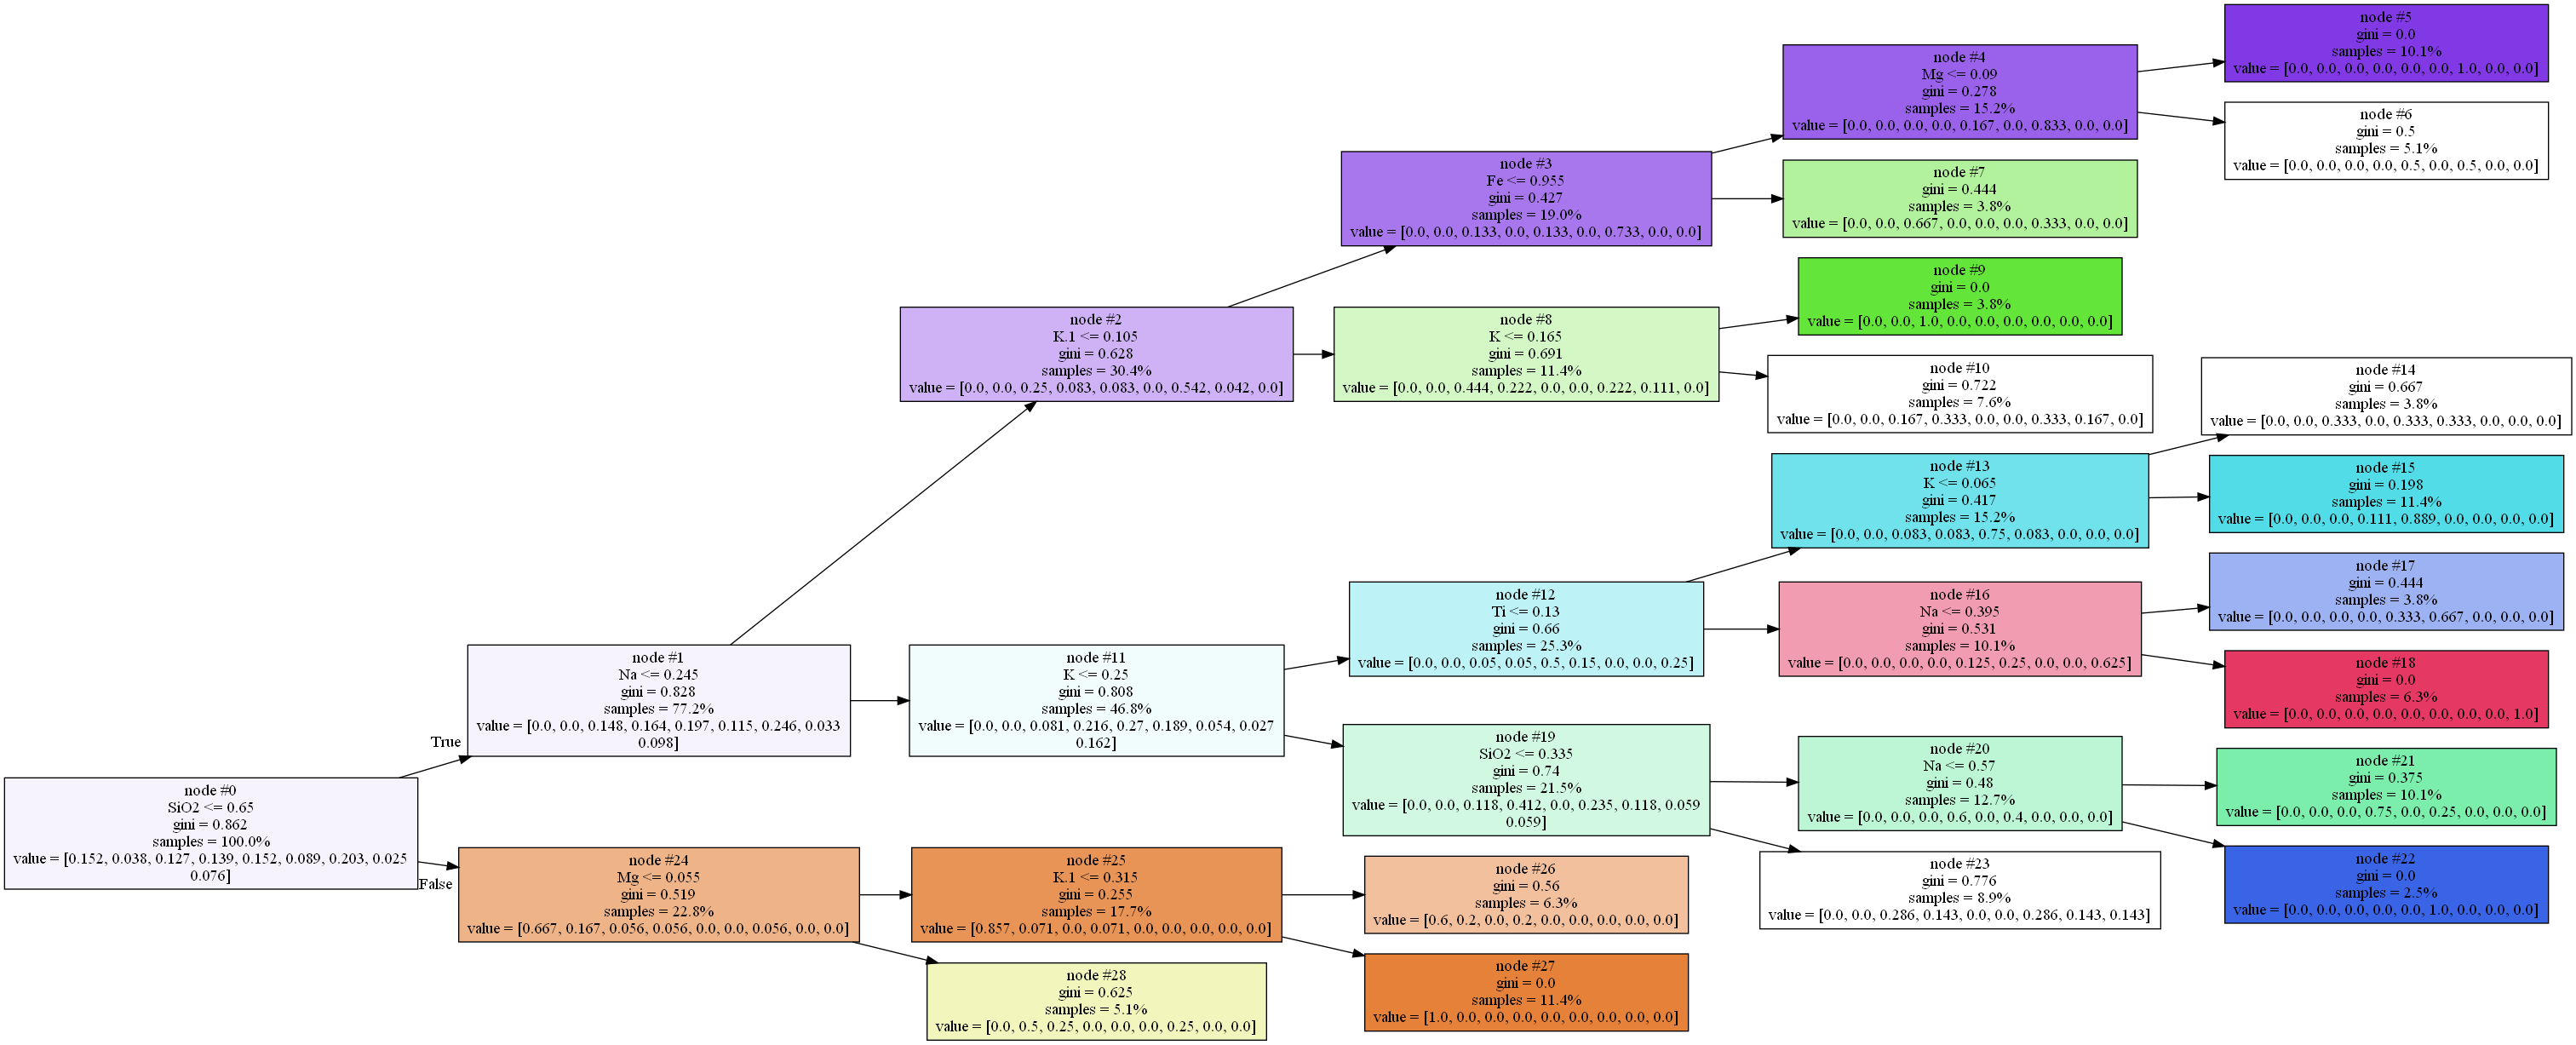

In [199]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(model,
                out_file='tree.dot',
                # задать названия фич
                feature_names=X.columns,
                class_names=None,
                # показывать названия полей у численных значений внутри узла
                label='all',
                # раскрашивать узлы в цвет преобладающего класса
                filled=True,
                # показывать значение impurity для каждого узла
                impurity=True,
                # показывать номера узлов
                node_ids=True,
                # Показывать доли каждого класса в узлах (а не количество)
                proportion=True,
                # Повернуть дерево на 90 градусов (вертикальная ориентация)
                rotate=True,
                # Число точек после запятой для отображаемых дробей
                # precision=3
               )
# Преобразуем файл tree.dot в tree.png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png']);
# Вставляем картинку в блокнот
Image("tree.png")

In [193]:
pd.DataFrame({'feature': X.columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
2,SiO2,0.223638
6,Mg,0.152830
0,K,0.152538
3,Na,0.151055
7,Ti,0.115226
5,Ca.1,0.099722
4,K.1,0.068344
8,Fe,0.036647
1,Ca,0.000000


In [194]:
pred= model.predict(X)

In [195]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y, pred)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1,2,3,4,5,6,7,8
0,12,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,0,0
2,0,0,9,0,0,0,1,0,0
3,1,0,0,8,1,0,1,0,0
4,0,0,1,0,10,1,0,0,0
5,0,0,1,2,0,4,0,0,0
6,0,0,2,0,2,0,12,0,0
7,0,0,0,0,0,0,2,0,0
8,0,0,1,0,0,0,0,0,5


In [196]:
from sklearn.metrics import accuracy_score
accuracy_score(y, pred)

0.7848101265822784